In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ukb_gwas import *

In [2]:
# get standard snp set for EDUYEARS fron Lee et al.
eduyears_lead_snps = pd.read_excel('41588_2018_147_MOESM3_ESM.xlsx', 
                                  sheet_name = '2. EduYears Lead SNPs',
                                  skipfooter = 2, header = 1, index_col = None )
snplist = eduyears_lead_snps.SNP.tolist()
print(len(snplist))
print(snplist[:5])

1271
['rs9859556', 'rs7029718', 'rs1334297', 'rs9375188', 'rs2526398']


In [3]:
# get betas and errors for original stratified GWAS
print('doing stayers')
sb,se = get_betas_and_errors('eduyears_wba_stayers')
print('done with stayers, doing movers')
mb,me = get_betas_and_errors('eduyears_wba_movers')
print('done with movers')

doing stayers
done with stayers, doing movers
done with movers


In [4]:
snplist_betas_stayer_wba = np.array([sb[x] for x in snplist if x in sb.keys()])
snplist_errors_stayer_wba = np.array([se[x] for x in snplist if x in se.keys()])
snplist_betas_mover_wba = np.array([mb[x] for x in snplist if x in mb.keys()])
snplist_errors_mover_wba = np.array([me[x] for x in snplist if x in me.keys()])
print(len(snplist_errors_mover_wba))

1252


In [5]:
# get ADD from the interaction term gwas
itb,ite = get_betas_and_errors('eduyears_addxmover_add')

In [6]:
snplist_betas_add = np.array([itb[x] for x in snplist if x in itb.keys()])
snplist_errors_add = np.array([ite[x] for x in snplist if x in ite.keys()])

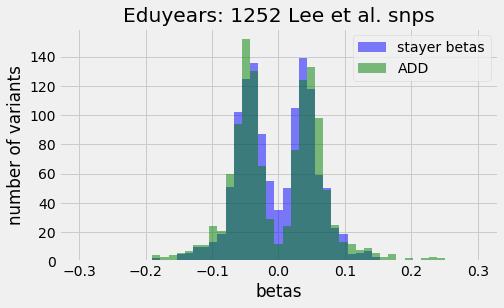

In [15]:
# compare ADD to beta_stayer
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = snplist_betas_stayer_wba
b2 = snplist_betas_add

bins = np.linspace(-0.3, 0.3, numBins)

f,a1 = plt.subplots(1,1,figsize = (7,4))
a1.hist(b1,bins,alpha = 0.5, label='stayer betas', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()

In [10]:
# compare ADD to beta_stayer
# magnitude ... do abs() unless signs opposite
snplist_betas_stayer_wba_magnitude = []
snplist_betas_add_magnitude = []

for i, sb1 in enumerate(snplist_betas_stayer_wba):
    sb2 = snplist_betas_add[i]
    if sb1 < 0 and sb2 < 0:
        snplist_betas_stayer_wba_magnitude.append(-sb1)
        snplist_betas_add_magnitude.append(-sb2)
    else: # either: both positive, or opposite signs
        snplist_betas_stayer_wba_magnitude.append(sb1)
        snplist_betas_add_magnitude.append(sb2)

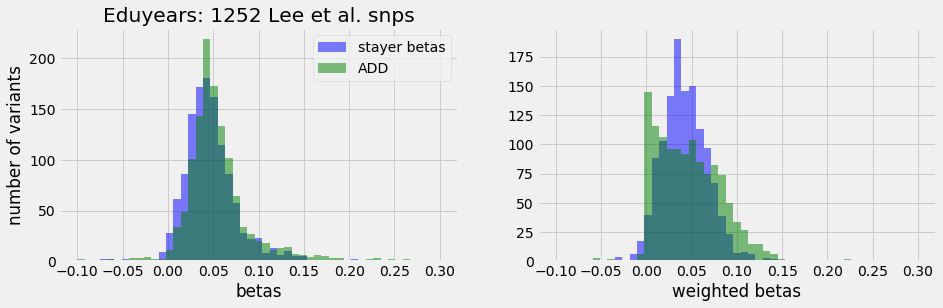

In [13]:
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = snplist_betas_stayer_wba_magnitude
b2 = snplist_betas_add_magnitude

bins = np.linspace(-0.1, 0.3, numBins)

f,(a1,a2) = plt.subplots(1,2,figsize = (14,4))
a1.hist(b1,bins,alpha = 0.5, label='stayer betas', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

j1,j2,wb1 = get_weighted_avg_beta(b1,snplist_errors_stayer_wba)
j1,j2,wb2 = get_weighted_avg_beta(b2,snplist_errors_add)
a2.hist(wb1,bins,alpha = 0.5, label='stayer\nweighted betas', color = 'blue')
a2.hist(wb2,bins,alpha = 0.5, label='ADD\nweighted betas', color = 'green')
a2.set_xlabel('weighted betas')
a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()

In [20]:
# get ADDxMOVER from the interaction term gwas
addxmover_b = {}
addxmover_e = {}
fdir = 'eduyears_addxmover_addxmover'
for chrom in np.arange(1,23):
    fname = fdir + '/chr' + str(chrom) + '.ADDxMOVER.glm.linear'
    chromDf = pd.read_csv(fname,delimiter = '\t')
    addxmover_b.update(dict(zip(chromDf.ID.values, chromDf.BETA.values)))
    addxmover_e.update(dict(zip(chromDf.ID.values, chromDf['SE'].values)))

In [24]:
# compare beta_movers with ADD + ADDxMOVER
# mover betas = mb, mover errors = me (dictionaries where key = snp, val = beta or error)
# add betas = itb, ite
# addxmover betas = addxmover_b, addxmover errors = addxmover_e
betas_movers = []
betas_interaction = []
for snp in snplist:
    if snp in mb.keys() and snp in itb.keys() and snp in addxmover_b.keys():
        betas_movers.append(mb[snp])
        betas_interaction.append(itb[snp] + addxmover_b[snp])
print(len(betas_movers))

1252


In [23]:
print(len(betas_movers))

1252


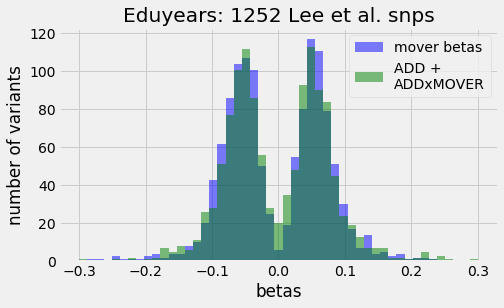

In [27]:
# compare beta_movers with ADD + ADDxMOVER
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = betas_movers
b2 = betas_interaction

bins = np.linspace(-0.3, 0.3, numBins)

f,a1 = plt.subplots(1,1,figsize = (7,4))
a1.hist(b1,bins,alpha = 0.5, label='mover betas', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD + \nADDxMOVER', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()

In [28]:
# compare ADD to beta_stayer
# magnitude ... do abs() unless signs opposite
betas_movers_magnitude = []
betas_interaction_magnitude = []

for i, sb1 in enumerate(betas_movers):
    sb2 = betas_interaction[i]
    if sb1 < 0 and sb2 < 0:
        betas_movers_magnitude.append(-sb1)
        betas_interaction_magnitude.append(-sb2)
    else: # either: both positive, or opposite signs
        betas_movers_magnitude.append(sb1)
        betas_interaction_magnitude.append(sb2)

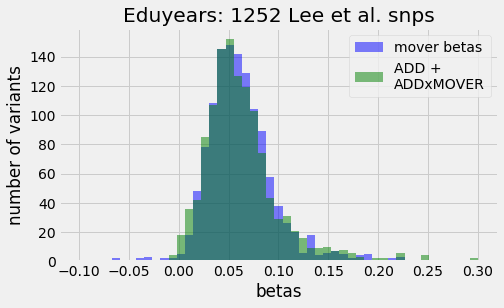

In [30]:
# compare beta_movers with ADD + ADDxMOVER
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = betas_movers_magnitude
b2 = betas_interaction_magnitude

bins = np.linspace(-0.1, 0.3, numBins)

f,a1 = plt.subplots(1,1,figsize = (7,4))
a1.hist(b1,bins,alpha = 0.5, label='mover betas', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD + \nADDxMOVER', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()

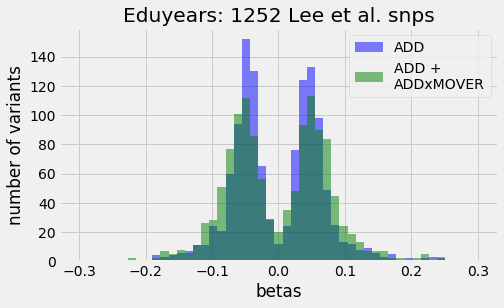

In [33]:
# compare ADD vs [ADD + ADDxMOVER]
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = snplist_betas_add
b2 = betas_interaction

bins = np.linspace(-0.3, 0.3, numBins)

f,a1 = plt.subplots(1,1,figsize = (7,4))
a1.hist(b1,bins,alpha = 0.5, label='ADD', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD + \nADDxMOVER', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()

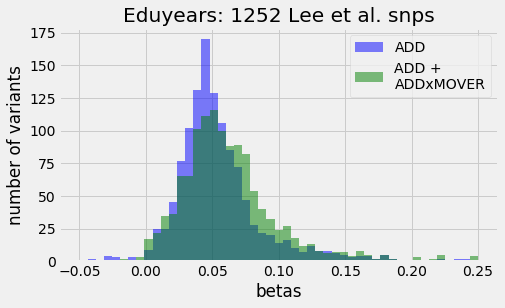

In [36]:
# compare ADD vs [ADD + ADDxMOVER]
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = snplist_betas_add_magnitude
b2 = betas_interaction_magnitude

bins = np.linspace(-0.05, 0.25, numBins)

f,a1 = plt.subplots(1,1,figsize = (7,4))
a1.hist(b1,bins,alpha = 0.5, label='ADD', color = 'blue')
a1.hist(b2,bins,alpha = 0.5, label='ADD + \nADDxMOVER', color = 'green')
a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('betas')

a1.set_title('Eduyears: 1252 Lee et al. snps')

plt.show()